In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal

## Functions

In [12]:
# Missing value treatment
def deal_missing_value(df):
    # check on missing value
    print(pd.isna(df).sum())

    # 45107 rows out of 63326 rows (gender) are null value, remove the whole column
    df = df.drop(['Gender'], axis = 1)

    return df

# plot boxplot
def plot_boxplot(df, col, desc):
    sns.boxplot(x = col, data = df).set(title = 'Boxplot of ' + col + " " + desc)
    plt.show()

# detecting the outliers using boxplot
def deal_outliers(df, col):
    Q1, Q3 = np.percentile(df[col] , [25, 75])
    IQR = Q3 - Q1
    ul = Q3 + 1.5 * IQR
    ll = Q1 - 1.5 * IQR

    outliers = df[(df[col] > ul) | (df[col] < ll)]
    print(len(outliers))
    
    df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))
    
    return df

def replace_negative_value(df, col):
    mean_v = df[col].mean()
    df.loc[df[col] <= 0, col] = mean_v

    return df
        
def obtain_unique_value(df, col):
    return dict(enumerate(df[col].unique()))

def heatmap(df):
    nominal.associations(df, figsize=(20, 10), mark_columns = True)

In [4]:
# Read csv data file
df = pd.read_csv('dataset.csv')

In [5]:
df = deal_missing_value(df)

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64


In [6]:
print(pd.isna(df).sum())

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64


In [7]:
df = replace_negative_value(df, 'Duration')
df = replace_negative_value(df, 'Age')

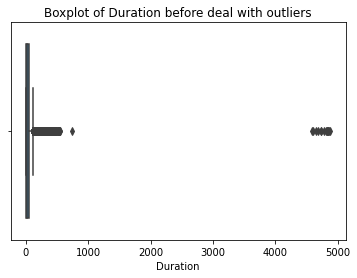

5566


C:\Users\Serene Ooi\AppData\Local\Temp\ipykernel_15780\2317823978.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


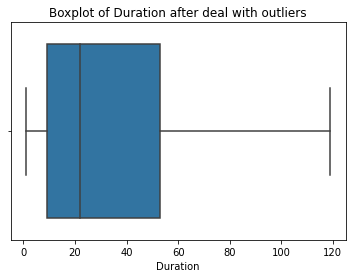

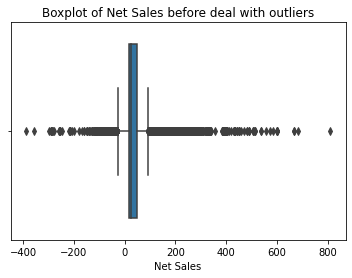

5543


C:\Users\Serene Ooi\AppData\Local\Temp\ipykernel_15780\2317823978.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


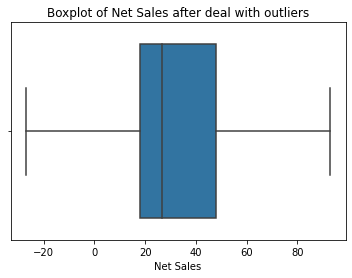

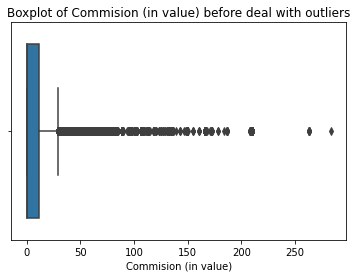

C:\Users\Serene Ooi\AppData\Local\Temp\ipykernel_15780\2317823978.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


7063


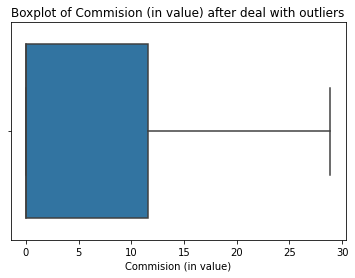

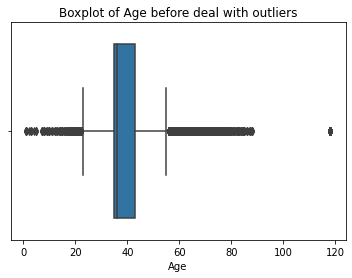

C:\Users\Serene Ooi\AppData\Local\Temp\ipykernel_15780\2317823978.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


7420


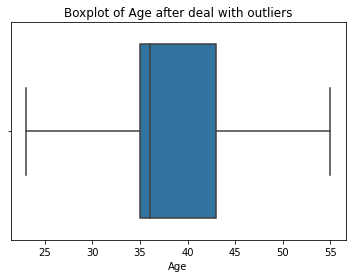

In [13]:
temp_df = df[['Duration', 'Net Sales', 'Commision (in value)', 'Age']]

# loop all the numeric features
for feature in temp_df:
    plot_boxplot(temp_df, feature, "before deal with outliers")
    temp_df = deal_outliers(temp_df, feature)
    plot_boxplot(temp_df, feature, "after deal with outliers")

In [14]:
transfomed_df = df.copy()

for feature in df.select_dtypes(include = 'object'):
    unique_value = obtain_unique_value(df, feature)
    unique_value = {v: k for k, v in unique_value.items()}
    # joe need use to convert back eh
    # convert = {k: v for k, v in unique_value.items()}
    # transfomed_df[feature] = df[feature].map(convert)
    transfomed_df[feature] = df[feature].replace(unique_value)

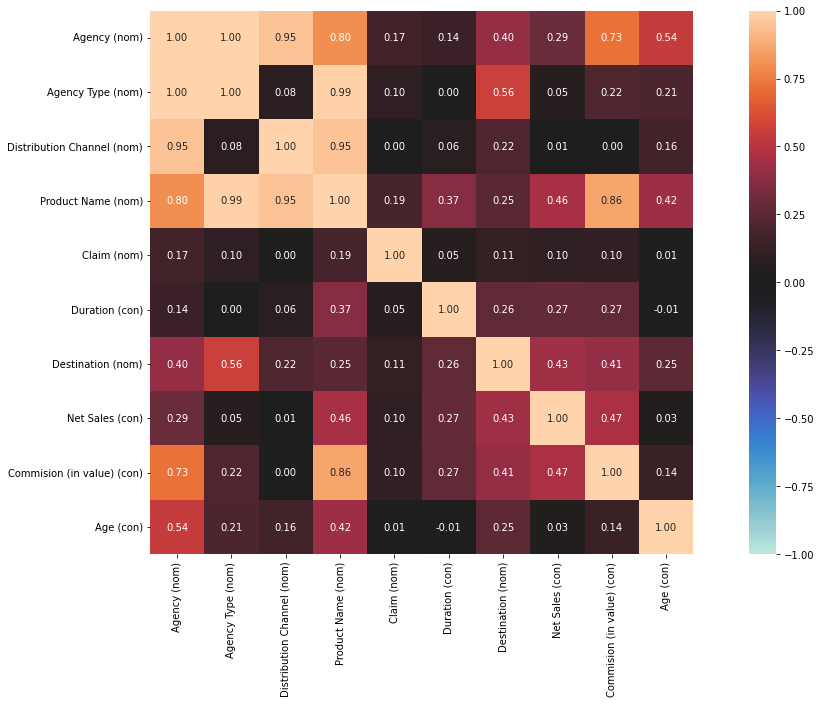

In [24]:
# feature selection
heatmap(df)

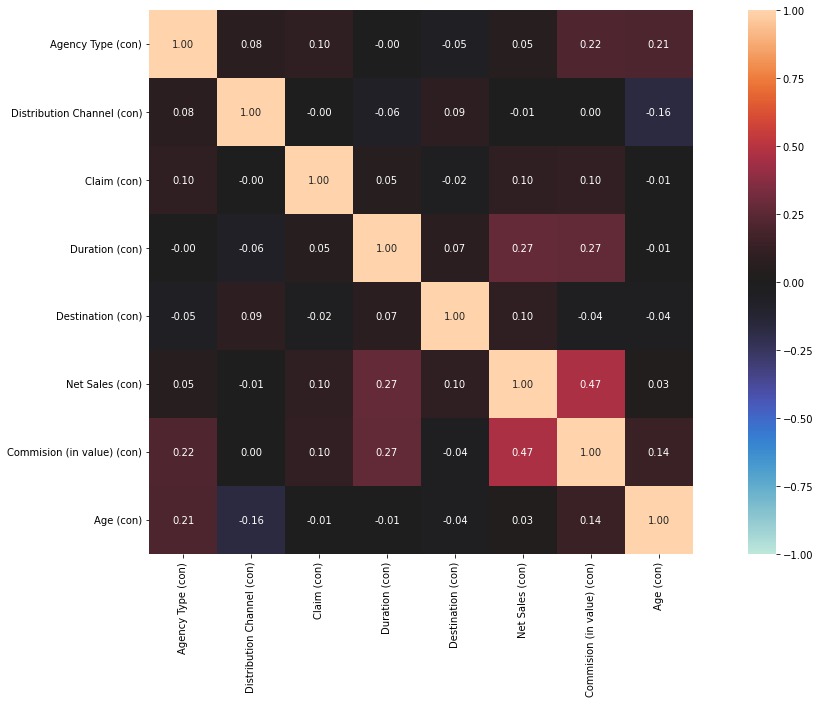

In [25]:
# decide to delete both columns, since high correlated to each other
del transfomed_df['Agency']
del transfomed_df['Product Name']

heatmap(transfomed_df)

In [15]:
transfomed_df.to_csv('dataset2.csv', index = False)